# Types of Encoding

## 1) Nominal Encoding (like gender,states)
- One Hot Encoding
- One Hot Encoding with many categorical (like pincode)
- Mean Encoding (like pincode) (pincodes are replaces by its mean value)
## 2) Ordinal Encoding (vary about the rank) (like rating)
- Label Encoding (rating , education)
- Target guided Ordinal Encoding (Label are given on the bases of mean. Highest the mean, highest the label)

In [1]:
import pandas as pd
import numpy as np

## 1.1 One Hot Encoding

In [2]:
dict={'Col1':['a','b','c']}
df=pd.DataFrame(data=dict)
df

,Col1
0,a
1,b
2,c


In [3]:
#pd.get_dummies(df)
pd.get_dummies(df,drop_first=True)

,Col1_b,Col1_c
0,0,0
1,1,0
2,0,1


Delete any col i.e col1_c because Col1_c can be describe by Col1_a & Col1_b

## 2.1 Label Encoding

In [4]:
dict={'Col1':['be','phd','bsc']}
df=pd.DataFrame(data=dict)
print(df)

  Col1
0   be
1  phd
2  bsc


In [5]:
mapping={'phd':2,'bsc':1,'be':0}
df['Col2']=df['Col1'].map(mapping)
df

,Col1,Col2
0,be,0
1,phd,2
2,bsc,1


## 1.2 :  One Hot Encoding with many categorical (like pincode)

- Suppose there are 50 categorias of a cols 
- Find most top 10 categories repeating most frequent
- Then take that 10 categorias and create 10 cols and 1 last col/any other col also will be removes

## 2.2:Target guided Ordinal Encoding

# Why Feature Scaling 
- Scaling down the feature it easy to run and calculations become easy
- All tree based models does not require scaling let it be regression pr classification problem

# Handle Missing  Values in Categorical variables
- Delete rows (When are less no. of NaN values)
- Replce with most frequent values (It tends to imbalanced dataset w.r.t that perticular variable)
- Treat them as a completely new category. df.ord_2.fillna("NONE"). If during live testing, we get new categories that we have not seen before or not trained, we will mark them as “NONE”.
- Apply classifier alog to predit NaN values (Most efficient technique) (KNN algo)
- Apply unsupervised ML

## 1) Count Encoding: Replace the categories with there count
- It is used when are are lots of categories of a variable
- It does not create new feature.
- Disadvantage: If same labels has same count then Replaced by same count and we will loose some valuable information

In [6]:
dict={'Col1':['be','phd','bsc','bsc']}
df=pd.DataFrame(data=dict)
print(df)

  Col1
0   be
1  phd
2  bsc
3  bsc


In [7]:
df['Col1'].value_counts().to_dict()

{'bsc': 2, 'be': 1, 'phd': 1}

In [8]:
df['Col1'].map(df['Col1'].value_counts().to_dict())

0    1
1    1
2    2
3    2
Name: Col1, dtype: int64

## Different types of missing data:
1. Missing Completely at Random (MCAR)
2. Missing Data Not At Random (MNAR)
3. Mising At Random (MAR)

## Techniques of handling missing values:
1. Mean/Median/Mode replacement : Data are missing completely at random (MCAR)
2. Random Sample Inputation
3. Capturing NAN values with new feature (It works well if the data are not missing completely at random and when there is lots of NaN values)
4. End of distribution imputation (Missing value is not at random then capturing that information is important)
5. Arbitrary  imputation
6. Frequent categories imputation

In [9]:
#https://www.kaggle.com/c/titanic-dataset
df=pd.read_csv('titanic-dataset/titanic_train.csv',usecols=['age','fare','survived'])
df2=df.copy()
print(df.head())
df.isnull().sum()

    age     fare  survived
0   NaN   7.7333         1
1  38.0   8.6625         0
2  30.0  24.1500         0
3  54.0  23.0000         1
4  40.0  13.0000         0


age         174
fare          1
survived      0
dtype: int64

### 1) Mean/Median/Mode replacement:

In [10]:
def impute_na(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    
impute_na(df,'age',df['age'].median())    

- Then check if std after filling with mean/median/mode with previous values

In [11]:
print(df['age'].std())
print(df['age_median'].std())

14.562243434125556
12.999022882894202


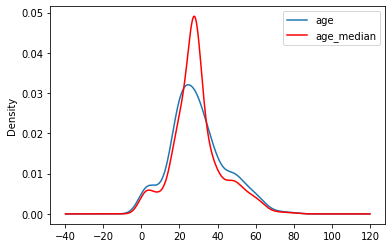

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure() 
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages & Disadvantages of Mean/median imputation
#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset
#### Disadvantages
3. Change or Distortion in the original variance
4. Impacts Correlation

For categorical variable,apply mode.


### 2. Random Sample Inputation
Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

#it will all the NaN values with some randomly selected sample with random_state=0

In [13]:
df=df2.copy()
df['age'].isnull().sum() #total NaN values

df['age'].dropna().sample(df['age'].isnull().sum(),random_state=0)

716    27.0
39     29.0
446    25.0
240     8.0
508    32.0
       ... 
801    47.0
669     9.0
768    21.0
16     40.0
250    48.0
Name: age, Length: 174, dtype: float64

In [14]:
def impute_nan(df,variable,median):
    
    df[variable+"_median"]=df[variable].fillna(median)

    df[variable+"_random"]=df[variable]

    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)

    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index #place NaN index to random_sample
    
    #replace where NaN are there
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
impute_nan(df,"age",df['age'].median())    

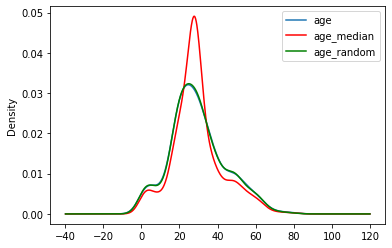

In [15]:
#plot

fig = plt.figure() 
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red')
df.age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

####  Advantages
- Easy To implement
- There is less distortion in variance

####  Disadvantage
- Every situation randomness wont work

### 3) Capturing NAN values with new feature
It works well if the data are not missing completely at random and when there is more no. of NaN cols

It capture the importance of NaN value

In [16]:
df=df2.copy()
df['age_NAN']=np.where(df['age'].isnull(),1,0)
df.head()

,age,fare,survived,age_NAN
0,NaN,7.7333,1,1
1,38.0,8.6625,0,0
2,30.0,24.1500,0,0
3,54.0,23.0000,1,0
4,40.0,13.0000,0,0


In [17]:
df['age'].fillna(df.age.median(),inplace=True) #also fill with Random Sample Imputation

Advantages
- Easy to implement
- Captures the importance of missing values

Disadvantages
- Creating Additional Features(Curse of Dimensionality)

### 4) End of distribution imputation
Missing value is not at random then capturing that information is important

We take the values that are after 3rd std

/home/abhash/anaconda3/envs/mypython3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age'>

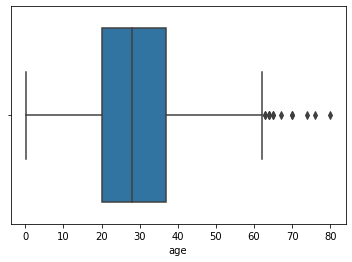

In [26]:
df=df2.copy()
import seaborn as sns
sns.boxplot('age',data=df)

In [27]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [28]:
extreme=df.age.mean()+3*df.age.std()
impute_nan(df,'age',df.age.median(),extreme)

df.head()

,age,fare,survived,age_end_distribution
0,28.0,7.7333,1,73.206577
1,38.0,8.6625,0,38.000000
2,30.0,24.1500,0,30.000000
3,54.0,23.0000,1,54.000000
4,40.0,13.0000,0,40.000000


/home/abhash/anaconda3/envs/mypython3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='age_end_distribution'>

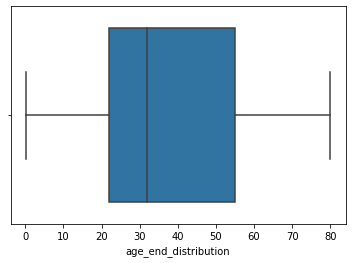

In [29]:
sns.boxplot('age_end_distribution',data=df)

### 5)Arbitrary Value Imputation
this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [31]:
df=df2.copy()
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

<AxesSubplot:>

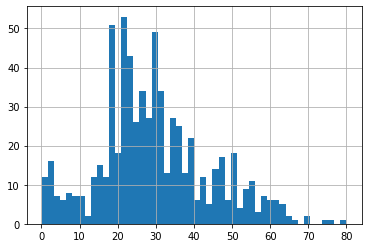

In [34]:
df['age'].hist(bins=50)

<AxesSubplot:>

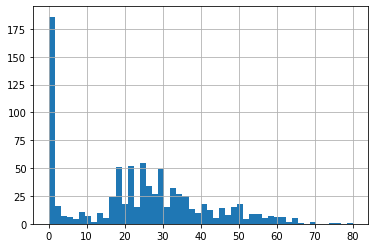

In [35]:
impute_nan(df,'age')
df['age_zero'].hist(bins=50)

<AxesSubplot:>

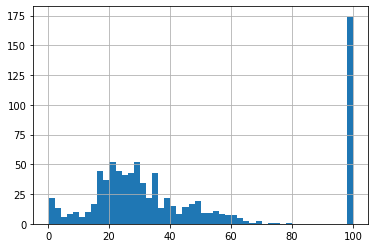

In [37]:
df['age_hundred'].hist(bins=50)

Advantages
- Easy to implement
- Captures the importance of missingess if there is one

Disadvantages
- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

### 6)Frequent Category Imputation

In [84]:
df=pd.read_csv('titanic-dataset/titanic_train.csv')
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [85]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

<AxesSubplot:>

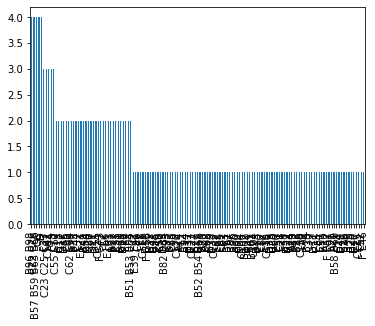

In [86]:
df['cabin'].value_counts().plot.bar()

<AxesSubplot:xlabel='cabin'>

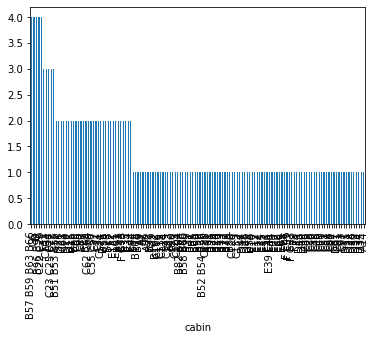

In [87]:
df.groupby(['cabin'])['cabin'].count().sort_values(ascending=False).plot.bar()

In [88]:
print(df.cabin.mode()[0])
print(df.groupby(['cabin'])['cabin'].count().sort_values(ascending=False).index[0])

B57 B59 B63 B66
B57 B59 B63 B66


In [89]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0] #return index of most frequent variable
    df[variable].fillna(most_frequent_category,inplace=True)

In [90]:
impute_nan(df,'cabin')

Advantages
- Easy To implement
- Fater way to implement

Disadvantages
- Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
- It distorts the relation of the most frequent label

##### Suppose if you have more frequent categories, we just replace NAN with a new category

In [102]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

# One Hot Encoder

In [124]:
df=pd.read_csv('titanic-dataset/titanic_train.csv')
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [128]:
df=df[['sex','embarked']]
df.head()

,sex,embarked
0,female,Q
1,male,S
2,female,S
3,female,S
4,male,S


In [129]:
df.value_counts()

sex     embarked
male    S           398
female  S           191
male    C           106
female  C            70
male    Q            47
female  Q            37
dtype: int64

In [130]:

df.dropna(inplace=True)
df.isnull().sum()

sex         0
embarked    0
dtype: int64

In [131]:
lst_10=df.embarked.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [132]:
lst_10

['S', 'C', 'Q']

In [135]:
for categories in lst_10:
    df[categories]=np.where(df['embarked']==categories,1,0)
lst_10.append('embarked')    

In [140]:
lst_10

['S', 'C', 'Q', 'embarked']

In [137]:
df=df[lst_10]
df

,S,C,Q,embarked
0,0,0,1,Q
1,1,0,0,S
2,1,0,0,S
3,1,0,0,S
4,1,0,0,S
...,...,...,...,...
845,1,0,0,S
846,0,1,0,C
847,1,0,0,S
848,1,0,0,S


In [139]:
df[(df.S==0) & (df.C==0) & (df.Q==0)]

,S,C,Q,embarked
